In [150]:
import numpy as np
import pandas as pd
pd.__version__    #查詢pandas 的版本資訊

'0.25.3'

## 1. pandas的數據結構

### 1.1 序列 

* 只能有兩列，其中一列為索引列，另一列是數值列。

In [151]:
return_series = pd.Series([0.003731,-0.001838,-0.003087,-0.024112], 
                          index=['中國石油', '工商銀行', '上汽集團', '寶鋼股份']) #手動輸入序列

In [152]:
return_series

中國石油    0.003731
工商銀行   -0.001838
上汽集團   -0.003087
寶鋼股份   -0.024112
dtype: float64

In [153]:
return_list = [0.003731, 0.021066, -0.004854, 0.006098, -0.00606, -0.001838, 0.001842,
              -0.016544, -0.003738, 0.003752, -0.003087, -0.000344, -0.033391, 0.007123,
              0.004597, -0.024112, 0.011704, -0.029563, -0.014570, 0.016129]
return_array = np.array(return_list)  #轉換為一維數組
return_array = return_array.reshape(4,5)  #轉換為4行5列的二維數組
return_array

array([[ 0.003731,  0.021066, -0.004854,  0.006098, -0.00606 ],
       [-0.001838,  0.001842, -0.016544, -0.003738,  0.003752],
       [-0.003087, -0.000344, -0.033391,  0.007123,  0.004597],
       [-0.024112,  0.011704, -0.029563, -0.01457 ,  0.016129]])

In [154]:
return_series2 = pd.Series(return_array[:,0], 
                          index=['中國石油', '工商銀行', '上汽集團', '寶鋼股份']) #通過數組生成序列
return_series2

中國石油    0.003731
工商銀行   -0.001838
上汽集團   -0.003087
寶鋼股份   -0.024112
dtype: float64

In [155]:
return_series3 = pd.Series([-0.001838, 0.001842, -0.016544, -0.003738, 0.003752],
                          index = ['2018-09-03','2018-09-04', '2018-09-05','2018-09-06',
                                   '2018-09-07']) #手動輸入序列
return_series3

2018-09-03   -0.001838
2018-09-04    0.001842
2018-09-05   -0.016544
2018-09-06   -0.003738
2018-09-07    0.003752
dtype: float64

In [156]:
return_series4 = pd.Series(return_array[1], index = ['2018-09-03','2018-09-04', '2018-09-05','2018-09-06',
                                   '2018-09-07']) #通過數組生成序列
return_series4

2018-09-03   -0.001838
2018-09-04    0.001842
2018-09-05   -0.016544
2018-09-06   -0.003738
2018-09-07    0.003752
dtype: float64

### 1.2 數據集 

* 數據集由3部分構成，第1部分為行索引(index)，第2部分是行名(columns)，第3部分是列(row)名數值。

In [157]:
date = ['2018-09-03','2018-09-04', '2018-09-05','2018-09-06','2018-09-07']
stock = ['中國石油', '工商銀行', '上汽集團', '寶鋼股份']
return_dataframe = pd.DataFrame(data = return_array.T, index = date, columns = stock)
return_dataframe

,中國石油,工商銀行,上汽集團,寶鋼股份
2018-09-03,0.003731,-0.001838,-0.003087,-0.024112
2018-09-04,0.021066,0.001842,-0.000344,0.011704
2018-09-05,-0.004854,-0.016544,-0.033391,-0.029563
2018-09-06,0.006098,-0.003738,0.007123,-0.014570
2018-09-07,-0.006060,0.003752,0.004597,0.016129


In [158]:
return_dataframe.to_excel('return.xlsx')

In [159]:
return_dataframe.to_csv('return.csv',encoding= 'big5')

In [160]:
return_dataframe.to_csv('return.txt',encoding= 'big5')

### 1.3 外部數據導入產生數據庫 


In [161]:
HS300_excel1 = pd.read_excel('滬深300指數.xlsx',sheet_name = "Sheet1", header = 0 , index_col=0)

In [162]:
HS300_excel1.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595


In [163]:
HS300_excel1.tail()

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536


#### 數據庫接口API
* TuShare -財經數據接口 http://tushare.org/index.html 
* Wind-金融終端 - 萬得 https://www.wind.com.cn/NewSite/wft.html
* 預測者網: 先註冊後登陸，歷史日線數據樣本數據下載鏈接：http://pan.baidu.com/s/1hsqA9hU


In [164]:
import tushare as ts
data  = ts.get_hist_data('hs300', start = '2018-01-01', end = '2019-01-31')
data = data.sort_index(axis = 0, ascending = True)
data.head()
#data.to_excel('share.xlsx')

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2018-01-02,4045.21,4087.78,4087.40,4045.21,1469354.38,56.55,1.40,4036.396,4041.179,4028.507,1104474.74,982607.59,966109.09
2018-01-03,4091.46,4140.05,4111.39,4088.73,1518522.12,23.99,0.59,4047.950,4048.785,4032.068,1225941.59,1056930.81,964991.66
2018-01-04,4114.12,4137.64,4128.81,4105.89,1345438.00,17.42,0.42,4075.470,4058.617,4037.717,1284722.04,1100870.11,977620.46
2018-01-05,4133.34,4151.28,4138.75,4123.28,1490098.75,9.94,0.24,4099.440,4065.707,4046.102,1345656.01,1153043.90,1006998.38
2018-01-08,4140.85,4166.32,4160.16,4127.31,1738776.62,21.41,0.52,4125.302,4076.263,4053.941,1512437.97,1253447.88,1049295.78


In [165]:
data.tail()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-01-25,3165.18,3203.17,3184.47,3164.41,839677.31,25.69,0.81,3162.652,3141.727,3086.832,767356.79,802926.10,824564.12
2019-01-28,3203.12,3228.87,3183.78,3174.72,826224.31,-0.69,-0.02,3162.280,3153.327,3096.495,744771.60,819426.83,825604.44
2019-01-29,3177.26,3200.99,3193.97,3148.23,776583.31,10.19,0.32,3172.410,3159.925,3105.661,754107.21,808312.20,828906.72
2019-01-30,3181.66,3202.90,3168.48,3167.89,637465.19,-25.49,-0.80,3177.896,3163.908,3115.608,761859.30,791844.38,826448.47
2019-01-31,3182.70,3216.07,3201.63,3178.01,862478.38,33.15,1.05,3186.466,3172.929,3127.448,788485.70,797917.34,834138.83


## 2.數據集可視化

In [166]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283BB50EBA8>,
      dtype=object)

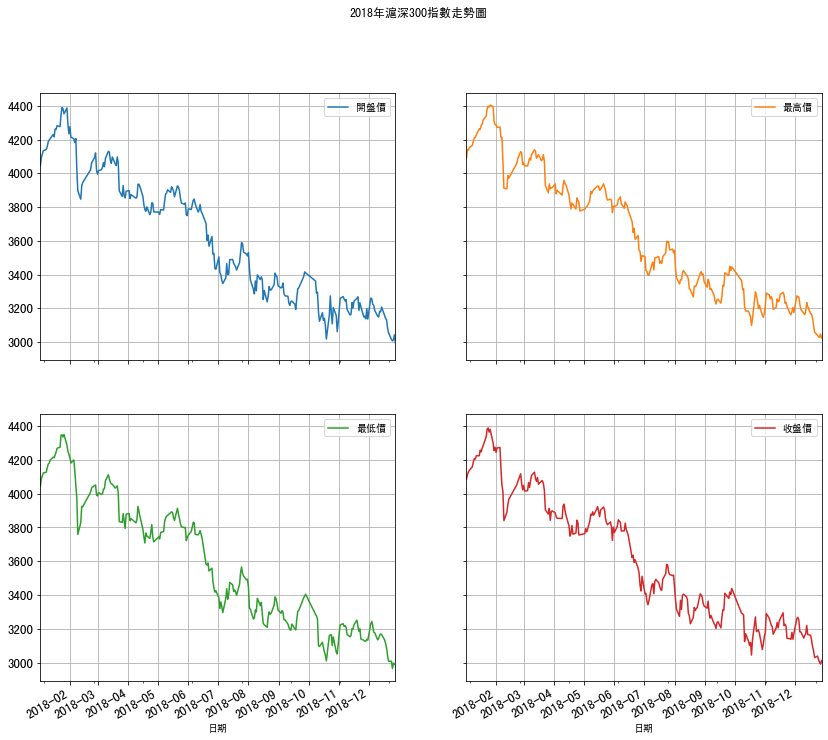

In [167]:
HS300_excel1.plot(kind = 'line', subplots = True, sharex = True, sharey = True, 
                  layout = (2,2), figsize = (14,12), title = '2018年滬深300指數走勢圖',
                  grid = True, fontsize = 13)

## 3. 數據集內部操作

### 3.1 數據集的基本性質

In [168]:
# index 與 columns函數 
HS300_excel1.index    #查看行索引名稱

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='日期', length=243, freq=None)

In [169]:
HS300_excel1.columns #查看行名稱

Index(['開盤價', '最高價', '最低價', '收盤價'], dtype='object')

In [170]:
#shape 與 descibe 函數
HS300_excel1.shape

(243, 4)

In [171]:
HS300_excel1.describe()

,開盤價,最高價,最低價,收盤價
count,243.000000,243.000000,243.000000,243.000000
mean,3605.910629,3633.511737,3576.081525,3605.809573
std,379.357328,378.562382,380.805563,380.883948
min,2994.795000,3024.352500,2964.875000,2990.505700
25%,3259.739050,3281.134050,3227.896000,3265.065300
50%,3521.587600,3541.782000,3478.213400,3517.656800
75%,3897.636750,3921.321600,3875.582550,3898.566550
max,4389.454700,4403.337500,4351.487100,4389.885300


### 3.2數據集的索引與截取

In [172]:
HS300_excel1.head(10)

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
2018-01-09,4157.5394,4191.2843,4153.5021,4189.2977
2018-01-10,4187.2044,4211.0549,4175.1355,4207.8132
2018-01-11,4197.1136,4211.7990,4181.9572,4205.5863
2018-01-12,4205.1444,4227.3923,4199.0251,4225.0010


In [173]:
HS300_excel1[:3] #截取前3列的數據

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119


In [174]:
HS300_excel1[2:8] #截取第3列至第8列的數據

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
2018-01-09,4157.5394,4191.2843,4153.5021,4189.2977
2018-01-10,4187.2044,4211.0549,4175.1355,4207.8132
2018-01-11,4197.1136,4211.7990,4181.9572,4205.5863


In [175]:
HS300_excel1.iloc[7:13,1:3] #截取第7列至第13列, 第2,第3行的數據

,最高價,最低價
日期,,
2018-01-11,4211.7990,4181.9572
2018-01-12,4227.3923,4199.0251
2018-01-15,4262.9314,4216.3585
2018-01-16,4260.2118,4213.1275
2018-01-17,4283.3449,4230.5367
2018-01-18,4292.6372,4246.6840


In [176]:
HS300_excel1[HS300_excel1['收盤價']>=4300] #設定1個條件

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-22,4276.4811,4338.4832,4275.8977,4336.5974
2018-01-23,4346.8885,4383.5722,4346.7925,4382.6129
2018-01-24,4389.4547,4397.8196,4349.0865,4389.8853
2018-01-25,4381.9768,4392.1963,4336.2386,4365.0794
2018-01-26,4352.2211,4403.3375,4351.4871,4381.2996
2018-01-29,4387.0577,4395.9053,4287.1124,4302.0181


In [177]:
HS300_excel1[(HS300_excel1['開盤價']>=4100)&(HS300_excel1['收盤價']<=4200)]#用 and 設定2個條件

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
2018-01-09,4157.5394,4191.2843,4153.5021,4189.2977
2018-02-06,4182.3257,4211.5234,4131.5562,4148.8856
2018-02-07,4205.7365,4212.5677,4048.4228,4050.4972
2018-02-27,4120.8712,4120.8712,4051.8054,4058.9806
2018-03-12,4130.7082,4139.5259,4112.7658,4127.6662
2018-03-13,4124.3312,4130.2829,4087.5629,4091.2533


### 3.3 數據集的排列
#### 3.3.1按索引大小排列

In [178]:
HS300_excel1.sort_index(axis=0, ascending=True) #用sort_index函數，ascending=True是由小到大，ascending=False是由大到小

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
...,...,...,...,...
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327


In [179]:
HS300_excel1.sort_index(axis=0, ascending=False)

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
...,...,...,...,...
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119


#### 3.3.2 按行變數名稱的數值大小排序

In [180]:
HS300_excel1.sort_values(by='收盤價', ascending=True) #按收盤價由小到大排序

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-21,3055.3258,3057.4007,3007.6096,3029.3951
...,...,...,...,...
2018-01-22,4276.4811,4338.4832,4275.8977,4336.5974
2018-01-25,4381.9768,4392.1963,4336.2386,4365.0794
2018-01-26,4352.2211,4403.3375,4351.4871,4381.2996


In [181]:
HS300_excel1.sort_values(by='最高價', ascending=False) #按最高價由大到小排序

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-01-26,4352.2211,4403.3375,4351.4871,4381.2996
2018-01-24,4389.4547,4397.8196,4349.0865,4389.8853
2018-01-29,4387.0577,4395.9053,4287.1124,4302.0181
2018-01-25,4381.9768,4392.1963,4336.2386,4365.0794
2018-01-23,4346.8885,4383.5722,4346.7925,4382.6129
...,...,...,...,...
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815


### 3.4數據集的更改
#### 3.4.1 修改行名變數名稱

In [182]:
HS300_columnschange = HS300_excel1.rename(columns={'收盤價':'收盤價格'}) #用字典形式改變
HS300_columnschange.head()

,開盤價,最高價,最低價,收盤價格
日期,,,,
2018-01-02,4045.2086,4087.7789,4045.2086,4087.4012
2018-01-03,4091.4607,4140.0543,4088.7302,4111.3925
2018-01-04,4114.1213,4137.6420,4105.8858,4128.8119
2018-01-05,4133.3439,4151.2818,4123.2817,4138.7505
2018-01-08,4140.8545,4166.3182,4127.3081,4160.1595


#### 3.4.2 缺失值處理

In [183]:
stock = pd.read_excel('關於2018年3月份股票價格數據.xlsx', sheet_name = "Sheet1", header=0, index_col=0) #導入外部數據
stock #缺失值用NaN表示

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-06,12.49,NaN,6.47
2018-03-07,12.49,49.22,6.44
2018-03-08,12.47,49.64,NaN
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37


In [184]:
#缺失值用刪除法
stock_dropna = stock.dropna()
stock_dropna

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-07,12.49,49.22,6.44
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37
2018-03-14,12.39,49.84,6.42
2018-03-15,12.39,50.00,6.42


In [185]:
#缺失值用補齊法(賦值零)
stock_fillzero = stock.fillna(value=0)
stock_fillzero 

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-06,12.49,0.00,6.47
2018-03-07,12.49,49.22,6.44
2018-03-08,12.47,49.64,0.00
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37


In [186]:
#缺失值用補齊法(向前補齊)
stock_ffill = stock.fillna(method = 'ffill')
stock_ffill

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-06,12.49,50.22,6.47
2018-03-07,12.49,49.22,6.44
2018-03-08,12.47,49.64,6.44
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37


In [187]:
#缺失值用補齊法(向後填充)
stock_bfill = stock.fillna(method='bfill')
stock_bfill

,浦发银行,上海机场,中国石化
日期,,,
2018-03-01,12.47,49.33,6.39
2018-03-02,12.41,50.35,6.33
2018-03-05,12.42,50.22,6.39
2018-03-06,12.49,49.22,6.47
2018-03-07,12.49,49.22,6.44
2018-03-08,12.47,49.64,6.39
2018-03-09,12.48,50.83,6.39
2018-03-12,12.50,50.09,6.45
2018-03-13,12.49,50.54,6.37


### 3.5 數據集間的操作

In [188]:
HS300_excel2 = pd.read_excel('滬深300指數.xlsx', sheet_name="Sheet2", header=0, index_col=0)
HS300_excel2.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632


In [189]:
HS300_excel2.tail()

,開盤價,最高價,最低價,收盤價
日期,,,,
2017-12-25,4057.4173,4086.9342,4026.4496,4041.5401
2017-12-26,4040.6173,4056.8554,4015.2996,4053.6224
2017-12-27,4045.2793,4047.7366,3986.7385,3991.2075
2017-12-28,3992.9970,4036.6975,3980.2358,4018.8974
2017-12-29,4022.8826,4043.1400,4012.8749,4030.8549


In [190]:
stock2 = pd.read_excel('關於2018年3月份股票價格數據.xlsx', sheet_name="Sheet2", header=0, index_col=0)
stock2

,东方航空,宝钢股份
日期,,
2018-03-01,7.6060,9.5103
2018-03-02,7.4473,9.1394
2018-03-05,7.4870,9.0443
2018-03-06,7.5961,9.1680
2018-03-07,7.4771,8.9587
2018-03-08,7.4870,8.9207
2018-03-09,7.5068,8.6544
2018-03-12,7.6258,8.7590
2018-03-13,7.5366,8.7780


In [191]:
#運用函數concat
HS300_new = pd.concat([HS300_excel2, HS300_excel1], axis=0)
HS300_new.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-05,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-06,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-07,3481.1499,3481.1499,3284.7374,3294.3839
2016-01-08,3371.8710,3418.8508,3237.9307,3361.5632


In [192]:
HS300_new.tail()

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-24,3015.4974,3040.3524,3007.3292,3038.1981
2018-12-25,3006.8787,3030.1418,2964.8750,3017.2815
2018-12-26,3012.8690,3029.0608,2996.4829,3002.0327
2018-12-27,3042.9491,3047.2348,2990.5057,2990.5057
2018-12-28,2994.7950,3024.3525,2984.8177,3010.6536


In [193]:
#按行拼接
stock_new = pd.concat([stock, stock2],axis=1)
stock_new

,浦发银行,上海机场,中国石化,东方航空,宝钢股份
日期,,,,,
2018-03-01,12.47,49.33,6.39,7.6060,9.5103
2018-03-02,12.41,50.35,6.33,7.4473,9.1394
2018-03-05,12.42,50.22,6.39,7.4870,9.0443
2018-03-06,12.49,NaN,6.47,7.5961,9.1680
2018-03-07,12.49,49.22,6.44,7.4771,8.9587
2018-03-08,12.47,49.64,NaN,7.4870,8.9207
2018-03-09,12.48,50.83,6.39,7.5068,8.6544
2018-03-12,12.50,50.09,6.45,7.6258,8.7590
2018-03-13,12.49,50.54,6.37,7.5366,8.7780


In [194]:
#merge 函數運用
pd.merge(left=stock, right=stock2, left_index=True, right_index=True)

,浦发银行,上海机场,中国石化,东方航空,宝钢股份
日期,,,,,
2018-03-01,12.47,49.33,6.39,7.6060,9.5103
2018-03-02,12.41,50.35,6.33,7.4473,9.1394
2018-03-05,12.42,50.22,6.39,7.4870,9.0443
2018-03-06,12.49,NaN,6.47,7.5961,9.1680
2018-03-07,12.49,49.22,6.44,7.4771,8.9587
2018-03-08,12.47,49.64,NaN,7.4870,8.9207
2018-03-09,12.48,50.83,6.39,7.5068,8.6544
2018-03-12,12.50,50.09,6.45,7.6258,8.7590
2018-03-13,12.49,50.54,6.37,7.5366,8.7780


In [195]:
#join函數的運用
stock.join(stock2, on = '日期')

,浦发银行,上海机场,中国石化,东方航空,宝钢股份
日期,,,,,
2018-03-01,12.47,49.33,6.39,7.6060,9.5103
2018-03-02,12.41,50.35,6.33,7.4473,9.1394
2018-03-05,12.42,50.22,6.39,7.4870,9.0443
2018-03-06,12.49,NaN,6.47,7.5961,9.1680
2018-03-07,12.49,49.22,6.44,7.4771,8.9587
2018-03-08,12.47,49.64,NaN,7.4870,8.9207
2018-03-09,12.48,50.83,6.39,7.5068,8.6544
2018-03-12,12.50,50.09,6.45,7.6258,8.7590
2018-03-13,12.49,50.54,6.37,7.5366,8.7780


### 3.6統計函數

In [196]:
# #一階差分
# HS300_diff = HS300_new.diff()
# HS300_diff.head()

In [197]:
#列最大值
HS300_new.idxmax()

開盤價   2018-01-24
最高價   2018-01-26
最低價   2018-01-26
收盤價   2018-01-24
dtype: datetime64[ns]

In [198]:
#列最小值
HS300_new.idxmin()

開盤價   2016-01-29
最高價   2016-02-29
最低價   2016-02-29
收盤價   2016-01-28
dtype: datetime64[ns]

In [199]:
#峰度
HS300_new.kurt()

開盤價   -0.664897
最高價   -0.647326
最低價   -0.679831
收盤價   -0.655301
dtype: float64

In [200]:
#最大值
HS300_new.max()

開盤價    4389.4547
最高價    4403.3375
最低價    4351.4871
收盤價    4389.8853
dtype: float64

In [201]:
#最小值
HS300_new.min()

開盤價    2855.5983
最高價    2939.8745
最低價    2821.2149
收盤價    2853.7562
dtype: float64

In [202]:
#平均數
HS300_new.mean()

開盤價    3499.743364
最高價    3523.404709
最低價    3476.860283
收盤價    3502.227122
dtype: float64

In [203]:
#中位數
HS300_new.median()

開盤價    3412.6523
最高價    3435.6366
最低價    3398.9532
收盤價    3421.4419
dtype: float64

In [204]:
#百分比變化
HS300_perc = HS300_new.pct_change()
HS300_perc.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.092242,-0.055828,-0.026425,0.002800
2016-01-06,0.029635,0.007254,0.027000,0.017543
2016-01-07,-0.000361,-0.017662,-0.052971,-0.069333
2016-01-08,-0.031392,-0.017896,-0.014250,0.020392


In [205]:
#分位數
HS300_new.quantile(q=0.2) #計算20%的分位數

開盤價    3204.2183
最高價    3229.6237
最低價    3181.8128
收盤價    3209.2902
Name: 0.2, dtype: float64

In [206]:
#偏度
HS300_new.skew()

開盤價    0.560578
最高價    0.593440
最低價    0.531947
收盤價    0.569104
dtype: float64

In [207]:
#數據移動，數據往後一列
HS300_shift1 = HS300_new.shift(1)
HS300_shift1.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,3725.8561,3726.2446,3468.9485,3469.0662
2016-01-06,3382.1769,3518.2170,3377.2799,3478.7797
2016-01-07,3482.4064,3543.7394,3468.4666,3539.8082
2016-01-08,3481.1499,3481.1499,3284.7374,3294.3839


In [208]:
#標準差
HS300_new.std()

開盤價    336.780663
最高價    336.231104
最低價    337.467202
收盤價    337.272162
dtype: float64

In [210]:
#求和
HS300_perc.sum()

開盤價   -0.163520
最高價   -0.174463
最低價   -0.106405
收盤價   -0.092767
dtype: float64

In [211]:
#樣本變異數
HS300_new.var()

開盤價    113421.215128
最高價    113051.355192
最低價    113884.112312
收盤價    113752.511207
dtype: float64

In [212]:
#累積求和
HS300_cumsum = HS300_perc.cumsum()
HS300_cumsum.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.092242,-0.055828,-0.026425,0.002800
2016-01-06,-0.062607,-0.048573,0.000575,0.020343
2016-01-07,-0.062968,-0.066235,-0.052397,-0.048990
2016-01-08,-0.094359,-0.084131,-0.066646,-0.028597


In [213]:
HS300_cumsum.tail()

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-24,-0.156813,-0.169238,-0.099052,-0.083726
2018-12-25,-0.159671,-0.172597,-0.113169,-0.090611
2018-12-26,-0.157679,-0.172953,-0.102508,-0.095665
2018-12-27,-0.147695,-0.166953,-0.104503,-0.099504
2018-12-28,-0.163520,-0.174463,-0.106405,-0.092767


In [214]:
#累積求積
HS300_chag = HS300_perc.fillna(value=0)+1
HS300_cumchag = HS300_chag.cumprod()
HS300_cumchag.head()

,開盤價,最高價,最低價,收盤價
日期,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,0.907758,0.944172,0.973575,1.002800
2016-01-06,0.934659,0.951022,0.999861,1.020392
2016-01-07,0.934322,0.934225,0.946897,0.949646
2016-01-08,0.904992,0.917506,0.933404,0.969011


In [215]:
HS300_cumchag.tail()

,開盤價,最高價,最低價,收盤價
日期,,,,
2018-12-24,0.809343,0.815929,0.866928,0.875797
2018-12-25,0.807030,0.813189,0.854690,0.869768
2018-12-26,0.808638,0.812899,0.863801,0.865372
2018-12-27,0.816711,0.817776,0.862078,0.862049
2018-12-28,0.803787,0.811636,0.860439,0.867857


In [217]:
#相關係數
HS300_new.corr()

,開盤價,最高價,最低價,收盤價
開盤價,1.000000,0.997848,0.996750,0.994180
最高價,0.997848,1.000000,0.996429,0.997193
最低價,0.996750,0.996429,1.000000,0.997661
收盤價,0.994180,0.997193,0.997661,1.000000


### 3.7動態統計

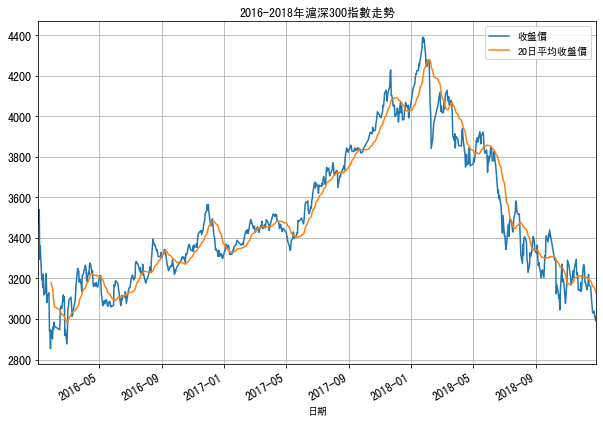

In [218]:
HS300_meanclose = HS300_new['收盤價'].rolling(window=20).mean() #產生一個20日平均收盤價的序列
HS300_meanclose = HS300_meanclose.to_frame() #將數據變成數據集
HS300_meanclose = HS300_meanclose.rename(columns={'收盤價':'20日平均收盤價'}) #修改新數列名
HS300_close = HS300_new['收盤價'].to_frame() #產生每日收盤價序列
HS300_new1 = pd.concat([HS300_close, HS300_meanclose], axis=1) #產生每日收盤價，20日平均收盤價的新數據集
HS300_new1.plot(figsize=(10,7), title=u'2016-2018年滬深300指數走勢', grid=True, fontsize=12) 

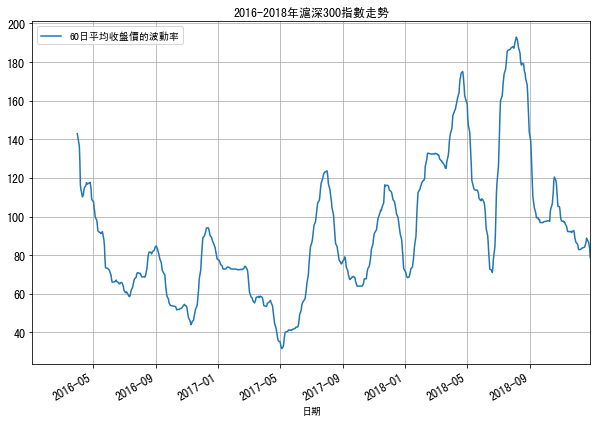

In [226]:
HS300_rollingstd = HS300_new['收盤價'].rolling(window=60).std() #產生一個20日平均收盤價的序列
HS300_rollingstd = HS300_rollingstd.to_frame()
HS300_rollingstd = HS300_rollingstd.rename(columns={'收盤價':'60日平均收盤價的波動率'})
HS300_rollingstd.plot(figsize=(10,7), title=u'2016-2018年滬深300指數走勢', grid=True, fontsize=12) 

In [228]:
HS300_rollingcorr = HS300_new.rolling(window=30).corr() 
HS300_rollingcorr = HS300_rollingcorr.dropna()
HS300_rollingcorr.head()

開盤價       最高價       最低價       收盤價
日期                                                    
2016-02-19 開盤價  1.000000  0.980264  0.955704  0.903957
           最高價  0.980264  1.000000  0.971737  0.953592
           最低價  0.955704  0.971737  1.000000  0.972716
           收盤價  0.903957  0.953592  0.972716  1.000000
2016-02-22 開盤價  1.000000  0.973813  0.952086  0.900403

In [229]:
HS300_rollingcorr.tail()

開盤價       最高價       最低價       收盤價
日期                                                    
2018-12-27 收盤價  0.924463  0.968102  0.978729  1.000000
2018-12-28 開盤價  1.000000  0.982534  0.972595  0.928031
           最高價  0.982534  1.000000  0.984309  0.969076
           最低價  0.972595  0.984309  1.000000  0.979887
           收盤價  0.928031  0.969076  0.979887  1.000000